In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df=pd.read_excel('Data_train.excel.xlsx')
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Vistara,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,20:20 16 May,24h,1 stop,No info,8610
1,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,12:35 13 Jun,18h 10m,2 stops,No info,14237
2,IndiGo,9/06/2019,Banglore,Delhi,BLR → DEL,07:10,10:05,2h 55m,non-stop,No info,4823
3,IndiGo,27/03/2019,Mumbai,Hyderabad,BOM → HYD,20:05,21:35,1h 30m,non-stop,No info,2227
4,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,04:25 19 May,21h 20m,1 stop,In-flight meal not included,12373
5,Air India,6/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,8372
6,Jet Airways,3/03/2019,Delhi,Cochin,DEL → BOM → COK,13:55,04:25 04 Mar,14h 30m,1 stop,No info,17024
7,Air India,27/05/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
8,Jet Airways,9/03/2019,Delhi,Cochin,DEL → BOM → COK,06:50,19:45,12h 55m,1 stop,In-flight meal not included,14053
9,IndiGo,9/05/2019,Chennai,Kolkata,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540


Importing dataset

1.Since data is in form of excel file we have to use pandas read_excel to load the data
2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3.Check whether any null values are there or not. if it is present then following can be done,
4.Imputing data using Imputation method in sklearn
5.Filling NaN values with mean, median and mode using fillna() method

In [78]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [79]:
df.shape

(1500, 11)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1500 non-null   object
 1   Date_of_Journey  1500 non-null   object
 2   Source           1500 non-null   object
 3   Destination      1500 non-null   object
 4   Route            1500 non-null   object
 5   Dep_Time         1500 non-null   object
 6   Arrival_Time     1500 non-null   object
 7   Duration         1500 non-null   object
 8   Total_Stops      1500 non-null   object
 9   Additional_Info  1500 non-null   object
 10  Price            1500 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 129.0+ KB


In [81]:
#Checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [82]:
df["Duration"].value_counts()

2h 50m     82
1h 30m     55
2h 45m     52
2h 55m     46
2h 35m     45
           ..
11h 20m     1
14h 40m     1
37h 25m     1
35h 35m     1
24h 55m     1
Name: Duration, Length: 282, dtype: int64

In [83]:
df.dropna(inplace = True)

In [84]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA
From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [85]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [86]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [87]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Vistara,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,20:20 16 May,24h,1 stop,No info,8610,15,5
1,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,12:35 13 Jun,18h 10m,2 stops,No info,14237,12,6
2,IndiGo,9/06/2019,Banglore,Delhi,BLR → DEL,07:10,10:05,2h 55m,non-stop,No info,4823,9,6
3,IndiGo,27/03/2019,Mumbai,Hyderabad,BOM → HYD,20:05,21:35,1h 30m,non-stop,No info,2227,27,3
4,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,07:05,04:25 19 May,21h 20m,1 stop,In-flight meal not included,12373,18,5


In [88]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [89]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [90]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Vistara,Kolkata,Banglore,CCU → DEL → BLR,20:20 16 May,24h,1 stop,No info,8610,15,5,20,20
1,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,12:35 13 Jun,18h 10m,2 stops,No info,14237,12,6,18,25
2,IndiGo,Banglore,Delhi,BLR → DEL,10:05,2h 55m,non-stop,No info,4823,9,6,7,10
3,IndiGo,Mumbai,Hyderabad,BOM → HYD,21:35,1h 30m,non-stop,No info,2227,27,3,20,5
4,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 19 May,21h 20m,1 stop,In-flight meal not included,12373,18,5,7,5


In [91]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [92]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Vistara,Kolkata,Banglore,CCU → DEL → BLR,24h,1 stop,No info,8610,15,5,20,20,20,20
1,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,18h 10m,2 stops,No info,14237,12,6,18,25,12,35
2,IndiGo,Banglore,Delhi,BLR → DEL,2h 55m,non-stop,No info,4823,9,6,7,10,10,5
3,IndiGo,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,No info,2227,27,3,20,5,21,35
4,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21h 20m,1 stop,In-flight meal not included,12373,18,5,7,5,4,25


In [93]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [94]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [95]:
df.drop(["Duration"], axis = 1, inplace = True)

In [96]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Vistara,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,8610,15,5,20,20,20,20,24,0
1,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,2 stops,No info,14237,12,6,18,25,12,35,18,10
2,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,4823,9,6,7,10,10,5,2,55
3,IndiGo,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,2227,27,3,20,5,21,35,1,30
4,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,12373,18,5,7,5,4,25,21,20


Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [97]:
df["Airline"].value_counts()

Jet Airways                          545
IndiGo                               303
Air India                            234
Multiple carriers                    165
SpiceJet                             108
Vistara                               64
Air Asia                              51
GoAir                                 27
Multiple carriers Premium economy      2
Jet Airways Business                   1
Name: Airline, dtype: int64

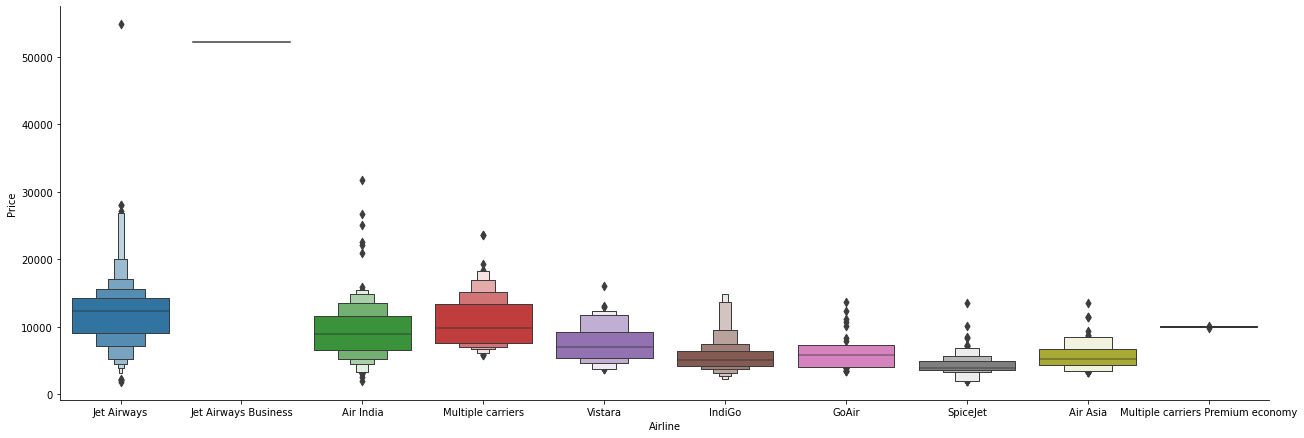

In [98]:
# From graph we can see that Jet Airways Business have the highest Price,also multiple carriers are bit high
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [99]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara
0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


In [100]:
df["Source"].value_counts()

Delhi       647
Kolkata     384
Banglore    314
Mumbai       95
Chennai      60
Name: Source, dtype: int64

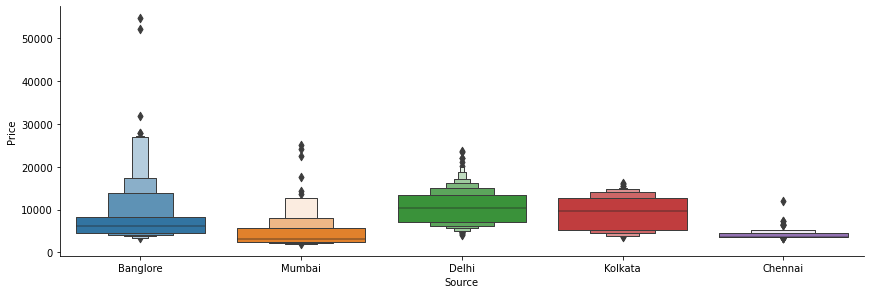

In [101]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [102]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


In [103]:
df["Destination"].value_counts()

Cochin       647
Banglore     384
Delhi        179
New Delhi    135
Hyderabad     95
Kolkata       60
Name: Destination, dtype: int64

In [104]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [105]:
df["Route"]

0             CCU → DEL → BLR
1       DEL → BDQ → BOM → COK
2                   BLR → DEL
3                   BOM → HYD
4             DEL → BOM → COK
                ...          
1495          DEL → BOM → COK
1496                BOM → HYD
1497                BLR → DEL
1498          DEL → BOM → COK
1499          CCU → BOM → BLR
Name: Route, Length: 1500, dtype: object

In [106]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [107]:
df["Total_Stops"].value_counts()

1 stop      798
non-stop    483
2 stops     216
3 stops       3
Name: Total_Stops, dtype: int64

In [108]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [109]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Vistara,Kolkata,Banglore,1,8610,15,5,20,20,20,20,24,0
1,Jet Airways,Delhi,Cochin,2,14237,12,6,18,25,12,35,18,10
2,IndiGo,Banglore,Delhi,0,4823,9,6,7,10,10,5,2,55
3,IndiGo,Mumbai,Hyderabad,0,2227,27,3,20,5,21,35,1,30
4,Jet Airways,Delhi,Cochin,1,12373,18,5,7,5,4,25,21,20


In [110]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [111]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Vistara,Kolkata,Banglore,1,8610,15,5,20,20,20,20,24,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,Jet Airways,Delhi,Cochin,2,14237,12,6,18,25,12,35,18,10,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,IndiGo,Banglore,Delhi,0,4823,9,6,7,10,10,5,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,IndiGo,Mumbai,Hyderabad,0,2227,27,3,20,5,21,35,1,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,Jet Airways,Delhi,Cochin,1,12373,18,5,7,5,4,25,21,20,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [112]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [113]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,8610,15,5,20,20,20,20,24,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,2,14237,12,6,18,25,12,35,18,10,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,4823,9,6,7,10,10,5,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,2227,27,3,20,5,21,35,1,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,12373,18,5,7,5,4,25,21,20,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [114]:
df.shape

(1500, 28)

# Test set

In [115]:
dfh=pd.read_excel('Test_set.xlsx')
dfh.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info
1,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,18:15,9h 50m,1 stop,In-flight meal not included
2,IndiGo,9/04/2019,Delhi,Cochin,DEL → HYD → COK,06:50,12:10,5h 20m,1 stop,No info
3,Jet Airways,9/05/2019,Delhi,Cochin,DEL → IDR → BOM → COK,21:25,12:35 10 May,15h 10m,2 stops,No info
4,IndiGo,18/05/2019,Delhi,Cochin,DEL → BOM → COK,17:30,01:30 19 May,8h,1 stop,No info
5,Air India,27/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,07:40 28 Jun,20h 45m,2 stops,No info
6,IndiGo,21/06/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info
7,Jet Airways,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,16:20 13 Jun,21h 25m,1 stop,In-flight meal not included
8,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,02:15,12:35,10h 20m,1 stop,In-flight meal not included
9,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,09:30 13 Mar,10h 35m,1 stop,In-flight meal not included


In [116]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(dfh.info())

print()
print()

print("Null values :")
print("-"*75)
dfh.dropna(inplace = True)
print(dfh.isnull().sum())

# EDA

# Date_of_Journey
dfh["Journey_day"] = pd.to_datetime(dfh.Date_of_Journey, format="%d/%m/%Y").dt.day
dfh["Journey_month"] = pd.to_datetime(dfh["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dfh.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
dfh["Dep_hour"] = pd.to_datetime(dfh["Dep_Time"]).dt.hour
dfh["Dep_min"] = pd.to_datetime(dfh["Dep_Time"]).dt.minute
dfh.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
dfh["Arrival_hour"] = pd.to_datetime(dfh.Arrival_Time).dt.hour
dfh["Arrival_min"] = pd.to_datetime(dfh.Arrival_Time).dt.minute
dfh.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(dfh["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
dfh["Duration_hours"] = duration_hours
dfh["Duration_mins"] = duration_mins
dfh.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(dfh["Airline"].value_counts())
Airline = pd.get_dummies(dfh["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(dfh["Source"].value_counts())
Source = pd.get_dummies(dfh["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(dfh["Destination"].value_counts())
Destination = pd.get_dummies(dfh["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
dfh.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
dfh.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
dfh = pd.concat([dfh, Airline, Source, Destination], axis = 1)

dfh.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", dfh.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1500 non-null   object
 1   Date_of_Journey  1500 non-null   object
 2   Source           1500 non-null   object
 3   Destination      1500 non-null   object
 4   Route            1500 non-null   object
 5   Dep_Time         1500 non-null   object
 6   Arrival_Time     1500 non-null   object
 7   Duration         1500 non-null   object
 8   Total_Stops      1500 non-null   object
 9   Additional_Info  1500 non-null   object
dtypes: object(10)
memory usage: 117.3+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [117]:
dfh.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,16,55,19,45,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,12,5,8,25,18,15,9,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,9,4,6,50,12,10,5,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,9,5,21,25,12,35,15,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,18,5,17,30,1,30,8,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**

In [121]:
dfh.shape

(1500, 28)

In [122]:
dfh.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [125]:
X = dfh.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,16,55,19,45,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,12,5,8,25,18,15,9,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,9,4,6,50,12,10,5,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,2,9,5,21,25,12,35,15,10,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
4,1,18,5,17,30,1,30,8,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


In [126]:
y = df.iloc[:, 1]
y.head()

0     8610
1    14237
2     4823
3     2227
4    12373
Name: Price, dtype: int64

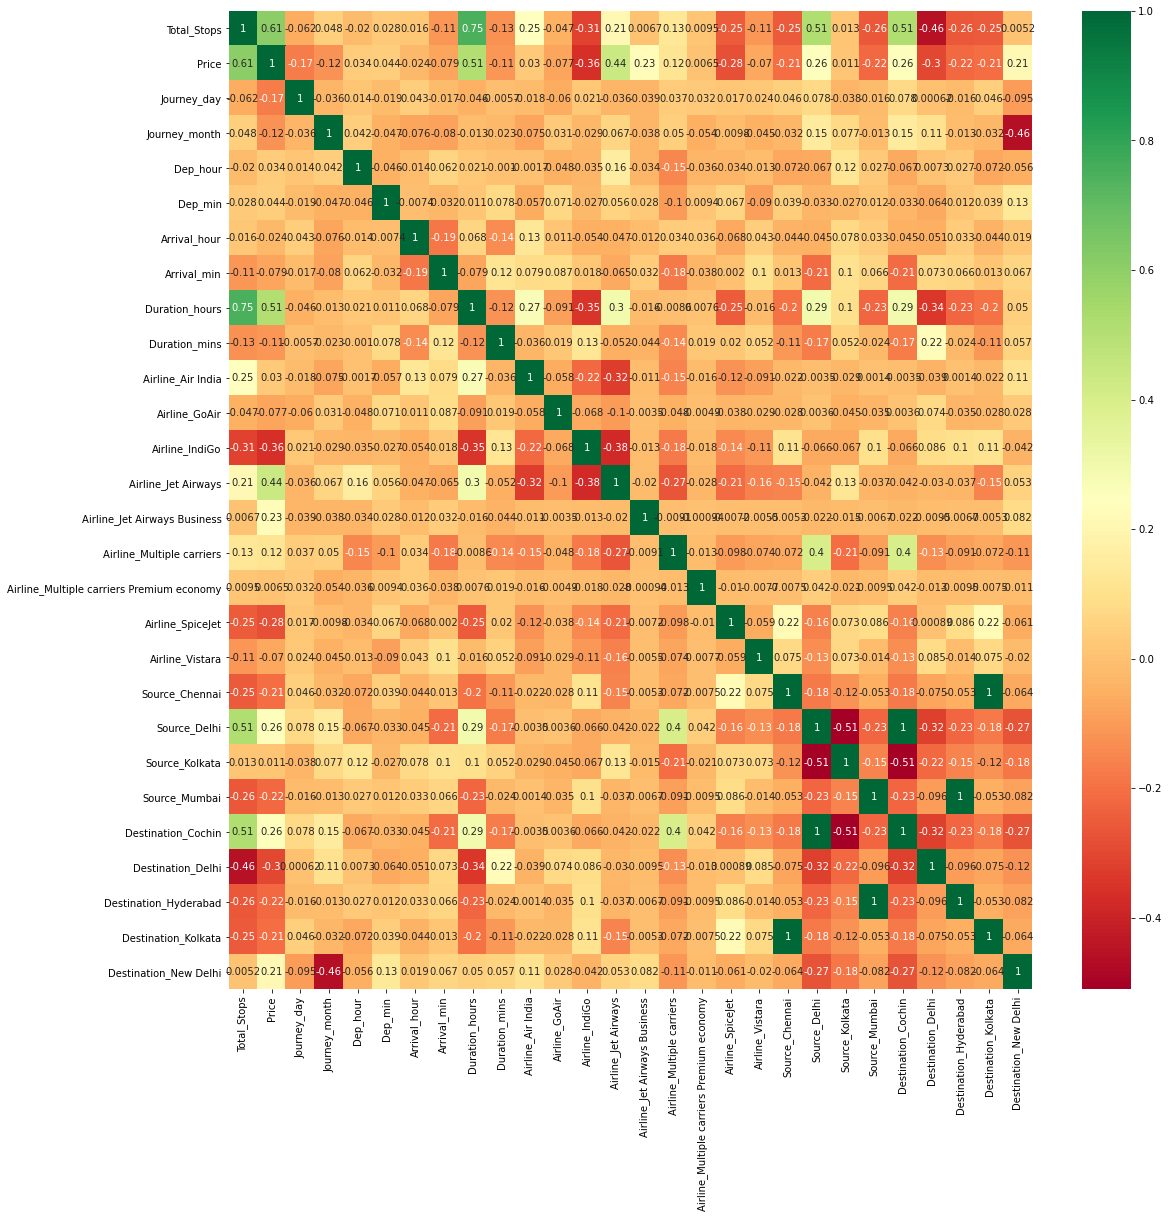

In [127]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [128]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [129]:
print(selection.feature_importances_)

[0.02075627 0.24704076 0.11459374 0.10188397 0.07642733 0.0688849
 0.06710781 0.08251506 0.07766888 0.01694125 0.00540674 0.0132458
 0.01255644 0.00039197 0.01095406 0.00246786 0.00849118 0.00666555
 0.00049394 0.00145515 0.00631032 0.0033823  0.00842332 0.00119793
 0.00361814 0.00648902 0.00582117 0.00379395 0.00416607 0.00917274
 0.00154686 0.0101295 ]


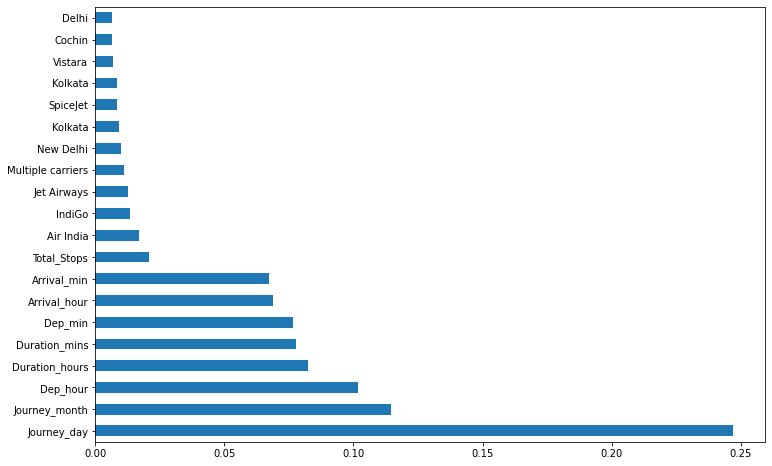

In [130]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
y_pred = reg_rf.predict(X_test)

In [134]:
reg_rf.score(X_train, y_train)

0.8234121338256383

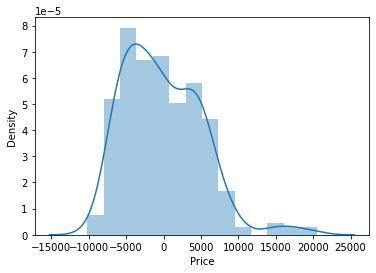

In [135]:
sns.distplot(y_test-y_pred)
plt.show()

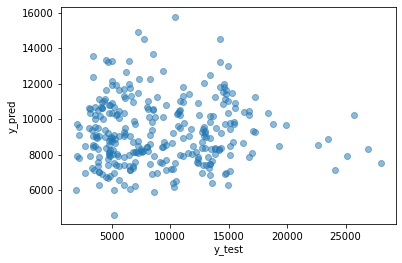

In [136]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [137]:
from sklearn import metrics

In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4253.190338809523
MSE: 27323503.34874451
RMSE: 5227.188857191264


In [139]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.03945477862076775

In [140]:
metrics.r2_score(y_test, y_pred)

-0.1263441048092071

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [142]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [143]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [144]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [145]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [147]:
prediction = rf_random.predict(X_test)

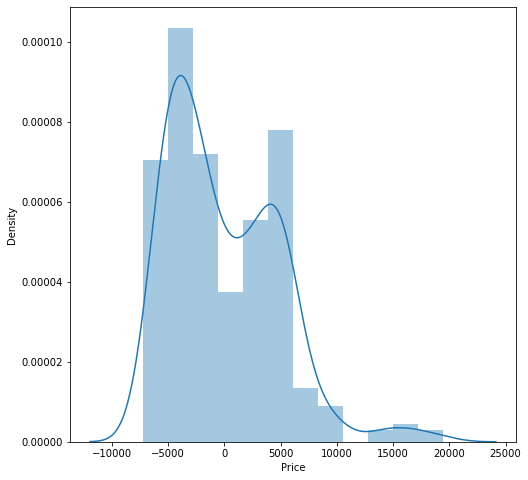

In [148]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

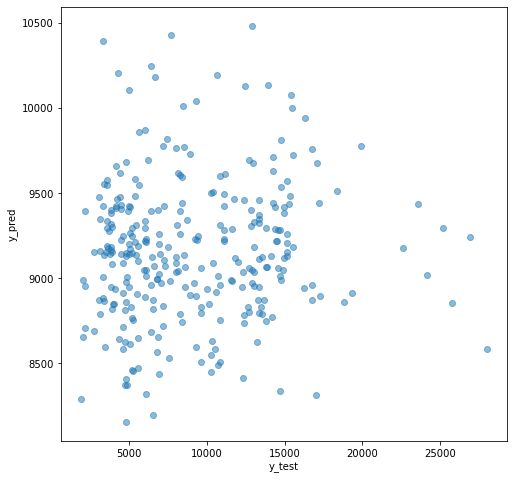

In [149]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4096.366895798532
MSE: 24110261.30664977
RMSE: 4910.220087394227


In [151]:
#Saving the model

In [152]:
import pickle
filename="Flight_Ticket_Prediction.csv"
pickle.dump(reg_rf,open(filename,"wb"))